In [361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from rdd import rdd
from datetime import datetime

In [364]:
####################################
#Code used to format the csv file

#Make a total cases col
cov_cases['Total Cases'] = cov_cases.sum(axis=1)
#Rename the colum
cov_cases = cov_cases.rename(columns={'Date de déclaration du cas':'Date'})
#Make index start at 1
cov_cases.index += 1
#Save as csv with added index 
cov_cases.to_csv('Data/info',index=True)
#Open
cases = pd.read_csv('Data/Covid_Cases_QC2')
#Re save without adding index
cases.to_csv('Data/Covid_Cases_QC2',index=False)
######################################

In [365]:
cov = pd.read_csv('Data/Covid_Cases_QC')

In [366]:
cov['Day_sq'] = cov['Day'].apply(np.square)
cov['Date'] = pd.to_datetime(cov['Date'])
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [487]:
#Days before and after first lockdown 
pre_LD1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= LOCKDOWN_1 )
post_LD1 = (cov['Date'] > LOCKDOWN_1) & (cov['Date'] <= '2020-4-24' )

#Entire period we are looking at
period1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= '2020-4-24')

#Days before and after school opening
pre_sch = (cov['Date'] > '2020-8-3') & (cov['Date'] <= SCHOOL_OPEN)
post_sch = (cov['Date'] > SCHOOL_OPEN) & (cov['Date'] <= '2020-10-12') 

period2 = (cov['Date'] > '2020-8-3') & (cov['Date'] <= '2020-10-12')

#Days before and after xmas lockdown
pre_xmas = (cov['Date'] > '2020-11-27') & (cov['Date'] <= LOCKDOWN_2)
post_xmas = (cov['Date'] > LOCKDOWN_2) & (cov['Date'] <= '2021-1-22')

period3 = (cov['Date'] > '2020-11-27') & (cov['Date'] <= '2021-1-22')

In [489]:
#Time periods for each graph

#Graph 1

#Temp df pre-lockdown 1
temp_prld = cov.loc[pre_LD1]
#Temp df post-lockdown 1
temp_pold = cov.loc[post_LD1]
#Temp df entire period around LD 1
temp_pd1 = cov.loc[period1]

#Graph 2

#Temp df pre-school opening
temp_prsc = cov.loc[pre_sch]
#Temp df post-school opening
temp_posc = cov.loc[post_sch]
#Temp df entire period around school opening 1
temp_pd2 = cov.loc[period2]

#Graph 3

#Temp df pre-lockdown xmas
temp_prxs = cov.loc[pre_xmas]
#Temp df post-lockdown xmas
temp_poxs = cov.loc[post_xmas]
#Temp df entire period around xmas LD
temp_pd3 = cov.loc[period3]

In [563]:
#Pre-locdown

X = temp_prld[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prld['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)


#model_1.summary()

In [564]:
#Post-Lockdown

X = temp_pold[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_pold['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

#model_2.summary()

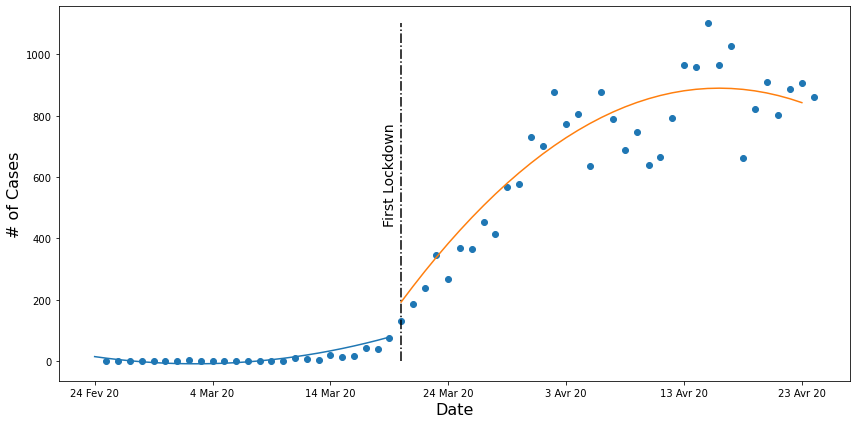

In [569]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd1.Day,y=temp_pd1.Cas,)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=450,x=24.5,s='First Lockdown',rotation=90,fontsize=14)
ax.vlines(x=26,ymin=temp_pd1.Cas.min(),ymax=temp_pd1.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(0,60,7),('24 Fev 20','4 Mar 20','14 Mar 20','24 Mar 20','3 Avr 20','13 Avr 20',
                                '23 Avr 20'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [372]:
##################################################

In [532]:
#Pre-School Opening

X = temp_prsc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prsc['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

#model_1.summary()

In [533]:
#Post-School Opening

X = temp_posc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_posc['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

#model_2.summary()

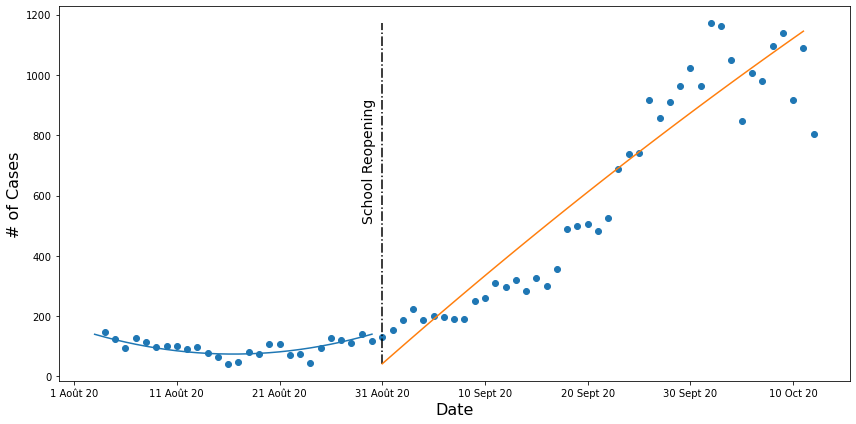

In [551]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd2.Day,y=temp_pd2.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=520,x=188,s='School Reopening',rotation=90,fontsize=14)
ax.vlines(x=190,ymin=temp_pd2.Cas.min(),ymax=temp_pd2.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(160,230,8),('1 Août 20','11 Août 20','21 Août 20','31 Août 20',
                                   '10 Sept 20','20 Sept 20','30 Sept 20','10 Oct 20'))
plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [376]:
########################

In [552]:
#Pre-Xmas Lockdown

X = temp_prxs[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prxs['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

#model_1.summary()

In [553]:
#Post-Xmas Lockdown

X = temp_poxs[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_poxs['Cas']

model_2 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

#model_1.summary()

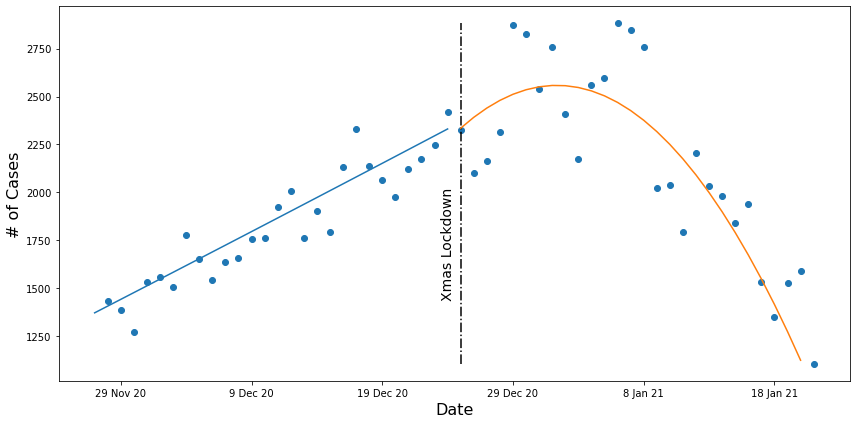

In [561]:

fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd3.Day,y=temp_pd3.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=1450,x=304.5,s='Xmas Lockdown',rotation=90,fontsize=14)
ax.vlines(x=306,ymin=temp_pd3.Cas.min(),ymax=temp_pd3.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(280,330,6),('29 Nov 20','9 Dec 20','19 Dec 20',
                                   '29 Dec 20','8 Jan 21','18 Jan 21'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()